In [8]:
# imports necessary plotting libraries, color definitions, etc. 
from src.utilities.plotting_import import *

# Load data

In [9]:
# Noiseless fidelities - limited by approximate compiling only
ideal_fidelities_hybrid = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_ideal_hybrid.p','rb'))
ideal_fidelities_naimark = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_ideal_naimark.p','rb'))
ideal_fidelities_binary = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_ideal_binary.p','rb'))

In [10]:
ideal_depths_hybrid = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_ideal_depths_hybrid.p','rb'))
ideal_depths_naimark = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_ideal_depths_naimark.p','rb'))
ideal_depths_binary = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_ideal_depths_binary.p','rb'))

In [11]:
# Error-mitigated experimental fidelities - limited by noise and approximate compiling
fidelities_naimark_rem, std_naimark_rem = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_kolkata_naimark_rem.p','rb'))
fidelities_binary_crem, std_binary_crem = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_kolkata_binary_crem.p','rb'))
fidelities_hybrid_crem, std_hybrid_crem = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_fidelities_kolkata_hybrid_crem.p','rb'))

In [12]:
# A subset of CNOT depths selected for the final plot
hardware_depths_hybrid = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_hardware_depths_hybrid.p','rb'))
hardware_depths_naimark = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_hardware_depths_naimark.p','rb'))
hardware_depths_binary = pickle.load(open(path+'data/final_results/state_tomography_results/state_2q_hardware_depths_binary.p','rb'))

In [13]:
# Peak fidelities for each algorithm
best_depth_hybrid = max(fidelities_hybrid_crem, key=fidelities_hybrid_crem.get)
best_depth_naimark = max(fidelities_naimark_rem, key=fidelities_naimark_rem.get)
best_depth_binary = max(fidelities_binary_crem, key=fidelities_binary_crem.get)

best_depth_index_hybrid = hardware_depths_hybrid.index(best_depth_hybrid)
best_depth_index_naimark = hardware_depths_naimark.index(best_depth_naimark)
best_depth_index_binary = hardware_depths_binary.index(best_depth_binary)

# Plot

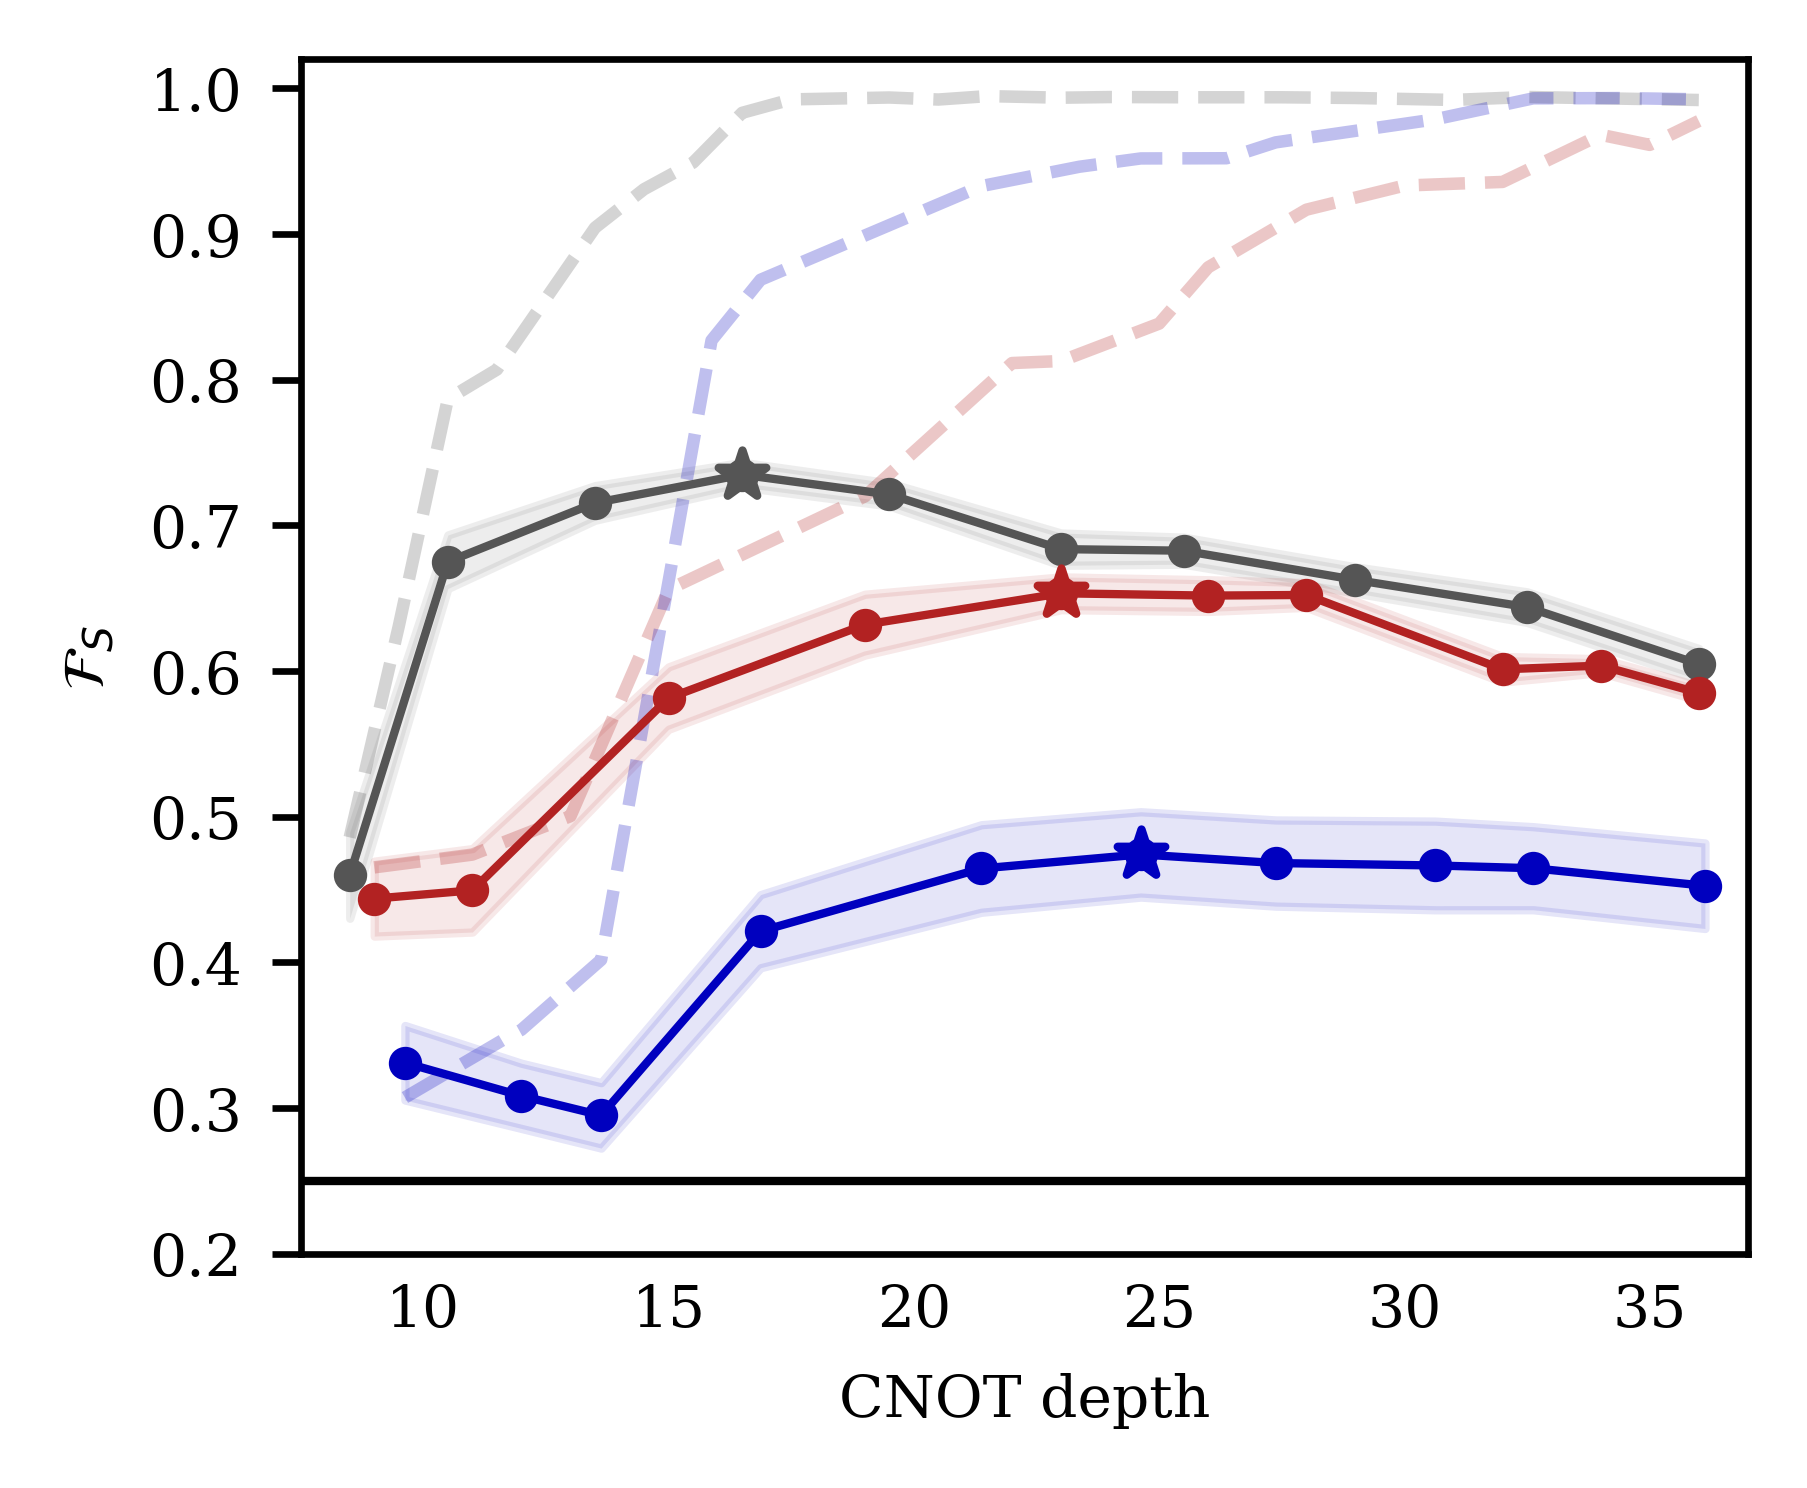

In [14]:
# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots(ncols=1, nrows=1, 
                        figsize=(figure_size_x/2, figure_size_y/1.5),
                        gridspec_kw={'height_ratios': [1]})

# Ideal fidelities 
ax.plot(ideal_depths_hybrid, 
        [ideal_fidelities_hybrid[d] for d in ideal_depths_hybrid], 
        '--', 
        color=dark_grey,
        label='Hybrid: ideal',
        alpha=0.25,
        linewidth=1.5)
ax.plot(ideal_depths_naimark, 
        [ideal_fidelities_naimark[d] for d in ideal_depths_naimark], 
        '--', 
        color=red,
        label='Naimark: ideal',
        alpha=0.25,
        linewidth=1.5)
ax.plot(ideal_depths_binary, 
        [ideal_fidelities_binary[d] for d in ideal_depths_binary], 
        '--', 
        color=blue,
        label='Binary: ideal',
        alpha=0.25,
        linewidth=1.5)

# Hardware fidelities
ax.plot(hardware_depths_hybrid, 
        [fidelities_hybrid_crem[d] for d in hardware_depths_hybrid], 
        '.-', 
        color=dark_grey,
        label='Hybrid: experiment')
ax.plot(hardware_depths_naimark, 
        [fidelities_naimark_rem[d] for d in hardware_depths_naimark], 
        '.-', 
        color=red,
        label='Naimark')
ax.plot(hardware_depths_binary, 
        [fidelities_binary_crem[d] for d in hardware_depths_binary], 
        '.-', 
        color=blue,
        label='Binary')

# Standard error of the mean - shaded area
ax.fill_between(hardware_depths_hybrid, 
                [fidelities_hybrid_crem[d]-std_hybrid_crem[d] for d in hardware_depths_hybrid],
                [fidelities_hybrid_crem[d]+std_hybrid_crem[d] for d in hardware_depths_hybrid],
                color=dark_grey, 
                alpha=0.1)
ax.fill_between(hardware_depths_naimark, 
                [fidelities_naimark_rem[d]-std_naimark_rem[d] for d in hardware_depths_naimark],
                [fidelities_naimark_rem[d]+std_naimark_rem[d] for d in hardware_depths_naimark],
                color=red, 
                alpha=0.1)
ax.fill_between(hardware_depths_binary, 
                [fidelities_binary_crem[d]-std_binary_crem[d] for d in hardware_depths_binary],
                [fidelities_binary_crem[d]+std_binary_crem[d] for d in hardware_depths_binary],
                color=blue, 
                alpha=0.1)

# Completely mixed state baseline
ax.hlines(0.25,xmin=0,xmax=40, color=black, linestyle='-', label='Completely mixed state')

# Mark top fidleities with a star
ax.scatter(best_depth_hybrid, 
        fidelities_hybrid_crem[best_depth_hybrid], 
        marker='*',
        color=dark_grey,
        alpha=1,
        zorder=3)
ax.scatter(best_depth_naimark, 
        fidelities_naimark_rem[best_depth_naimark], 
        marker='*',
        color=red,
        alpha=1,
        zorder=3)
ax.scatter(best_depth_binary, 
        fidelities_binary_crem[best_depth_binary], 
        marker='*',
        color=blue,
        alpha=1,
        zorder=3)

# Axes properties
ax.set_xlim(hardware_depths_hybrid[0]-1, hardware_depths_hybrid[-1]+1)
ax.set_ylim(0.2,1.02)
ax.set_xlabel('CNOT depth')
ax.set_ylabel('$\mathcal{F}_S$')

# Save as SVG to import in Ikscape
fig.tight_layout()